In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

In [2]:
# data import

# 파일 경로에 맞게 수정하세요
file_path = 'SeoulBikeData_전처리.csv'

# CSV 파일 불러오기 (인코딩 문제 시 encoding='utf-8' 또는 'cp949' 조정)
data = pd.read_csv(file_path, encoding='utf-8')

# 데이터 일부 확인
print(data.head())

           날짜  대여량  시간  기온(°C)  습도(%)  풍속(m/s)  가시거리(10m)  이슬점 온도(°C)  \
0  01/12/2017  254   0    -5.2     37      2.2       2000       -17.6   
1  01/12/2017  204   1    -5.5     38      0.8       2000       -17.6   
2  01/12/2017  173   2    -6.0     39      1.0       2000       -17.7   
3  01/12/2017  107   3    -6.2     40      0.9       2000       -17.6   
4  01/12/2017   78   4    -6.0     36      2.3       2000       -18.6   

   일사량(MJ/m2)  강수량(mm)  적설(cm)      계절      공휴일 여부 정상운영일 여부  시간대  
0         0.0      0.0     0.0  Winter  No Holiday      Yes    1  
1         0.0      0.0     0.0  Winter  No Holiday      Yes    1  
2         0.0      0.0     0.0  Winter  No Holiday      Yes    1  
3         0.0      0.0     0.0  Winter  No Holiday      Yes    1  
4         0.0      0.0     0.0  Winter  No Holiday      Yes    2  


In [ ]:
# 한글 폰트 설정 코드 (Matplotlib용)
# Matplotlib 시각화 할 때 한글 폰트 제대로 지원하도록 설정하는 코드입니다.
# 수정하지 마세용.
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

def set_korean_font():
    system_name = platform.system()
    if system_name == 'Windows':
        font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
    elif system_name == 'Darwin':  # macOS
        # macOS 기본 한글 폰트 예: AppleGothic
        font_path = '/System/Library/Fonts/AppleGothic.ttf'
    else:  # Linux
        # 대표적인 한글 폰트 경로 (예: 나눔고딕)
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    
    try:
        font_name = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font_name)
        print(f"{system_name}에서 '{font_name}' 폰트를 설정했습니다.")
    except Exception as e:
        print(f"폰트 설정에 실패했습니다: {e}")
        print("시스템 기본 폰트를 사용합니다.")
    
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

set_korean_font()

Windows에서 'Malgun Gothic' 폰트를 설정했습니다.


In [5]:
def time_group(hour):
    if 0 <= hour <= 5:
        return '새벽(0-5)'
    elif 6 <= hour <= 11:
        return '아침(6-11)'
    elif 12 <= hour <= 17:
        return '오후(12-17)'
    else:
        return '저녁(18-23)'

data['시간대_그룹'] = data['시간'].apply(time_group)
print(data.head())

           날짜  대여량  시간  기온(°C)  습도(%)  풍속(m/s)  가시거리(10m)  이슬점 온도(°C)  \
0  01/12/2017  254   0    -5.2     37      2.2       2000       -17.6   
1  01/12/2017  204   1    -5.5     38      0.8       2000       -17.6   
2  01/12/2017  173   2    -6.0     39      1.0       2000       -17.7   
3  01/12/2017  107   3    -6.2     40      0.9       2000       -17.6   
4  01/12/2017   78   4    -6.0     36      2.3       2000       -18.6   

   일사량(MJ/m2)  강수량(mm)  적설(cm)      계절      공휴일 여부 정상운영일 여부  시간대   시간대_그룹  
0         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
1         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
2         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
3         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
4         0.0      0.0     0.0  Winter  No Holiday      Yes    2  새벽(0-5)  


In [6]:
# 범주형 변수 지정
categorical_vars = ['계절', '공휴일 여부', '정상운영일 여부', '시간대_그룹']
for var in categorical_vars:
    data[var] = data[var].astype('category')

print(data.head())

           날짜  대여량  시간  기온(°C)  습도(%)  풍속(m/s)  가시거리(10m)  이슬점 온도(°C)  \
0  01/12/2017  254   0    -5.2     37      2.2       2000       -17.6   
1  01/12/2017  204   1    -5.5     38      0.8       2000       -17.6   
2  01/12/2017  173   2    -6.0     39      1.0       2000       -17.7   
3  01/12/2017  107   3    -6.2     40      0.9       2000       -17.6   
4  01/12/2017   78   4    -6.0     36      2.3       2000       -18.6   

   일사량(MJ/m2)  강수량(mm)  적설(cm)      계절      공휴일 여부 정상운영일 여부  시간대   시간대_그룹  
0         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
1         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
2         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
3         0.0      0.0     0.0  Winter  No Holiday      Yes    1  새벽(0-5)  
4         0.0      0.0     0.0  Winter  No Holiday      Yes    2  새벽(0-5)  


In [7]:
print(data.describe())            # 연속형 변수 요약
print(data[categorical_vars].describe())  # 범주형 변수 요약

               대여량           시간       기온(°C)        습도(%)      풍속(m/s)  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    704.602055    11.500000    12.882922    58.226256     1.724909   
std     644.997468     6.922582    11.944825    20.362413     1.036300   
min       0.000000     0.000000   -17.800000     0.000000     0.000000   
25%     191.000000     5.750000     3.500000    42.000000     0.900000   
50%     504.500000    11.500000    13.700000    57.000000     1.500000   
75%    1065.250000    17.250000    22.500000    74.000000     2.300000   
max    3556.000000    23.000000    39.400000    98.000000     7.400000   

         가시거리(10m)   이슬점 온도(°C)   일사량(MJ/m2)      강수량(mm)       적설(cm)  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean   1436.825799     4.073813     0.569111     0.148687     0.075068   
std     608.298712    13.060369     0.868746     1.128193     0.436746   
min      27.000000   -30.600000     0

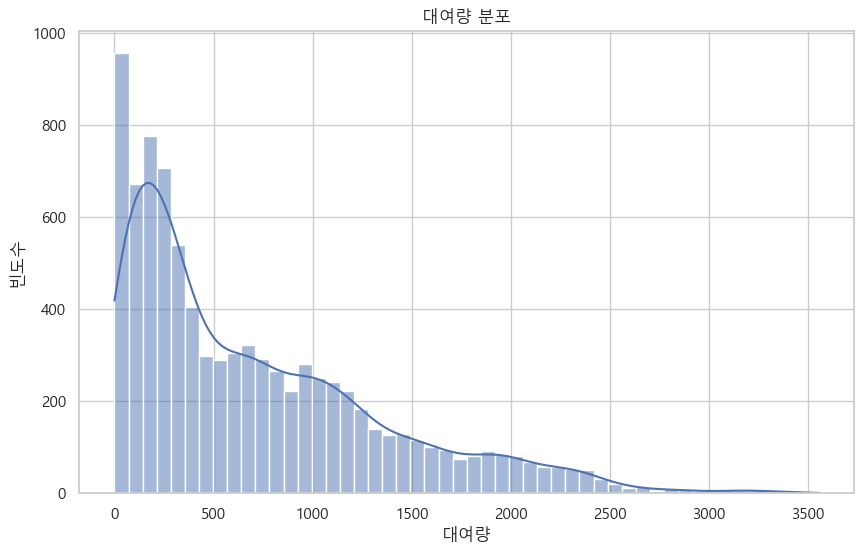

In [ ]:
# 대여량 변수 분포 시각화

plt.figure(figsize=(10,6))
sns.histplot(data['대여량'], bins=50, kde=True)
plt.title('대여량 분포')
plt.xlabel("대여량")
plt.ylabel('빈도수')
plt.show()

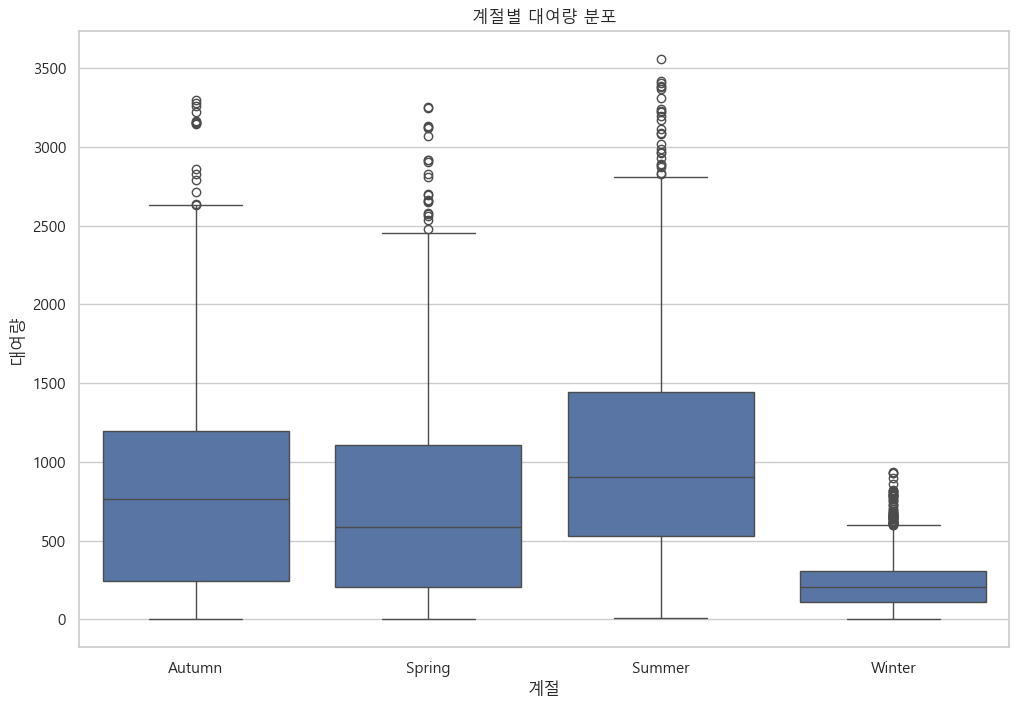

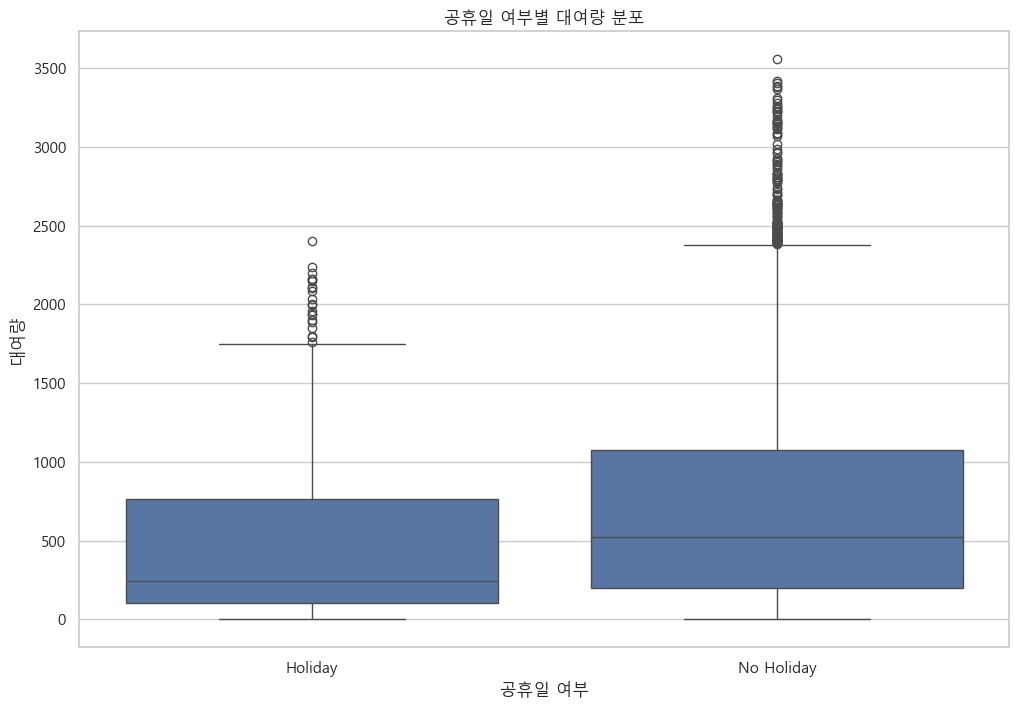

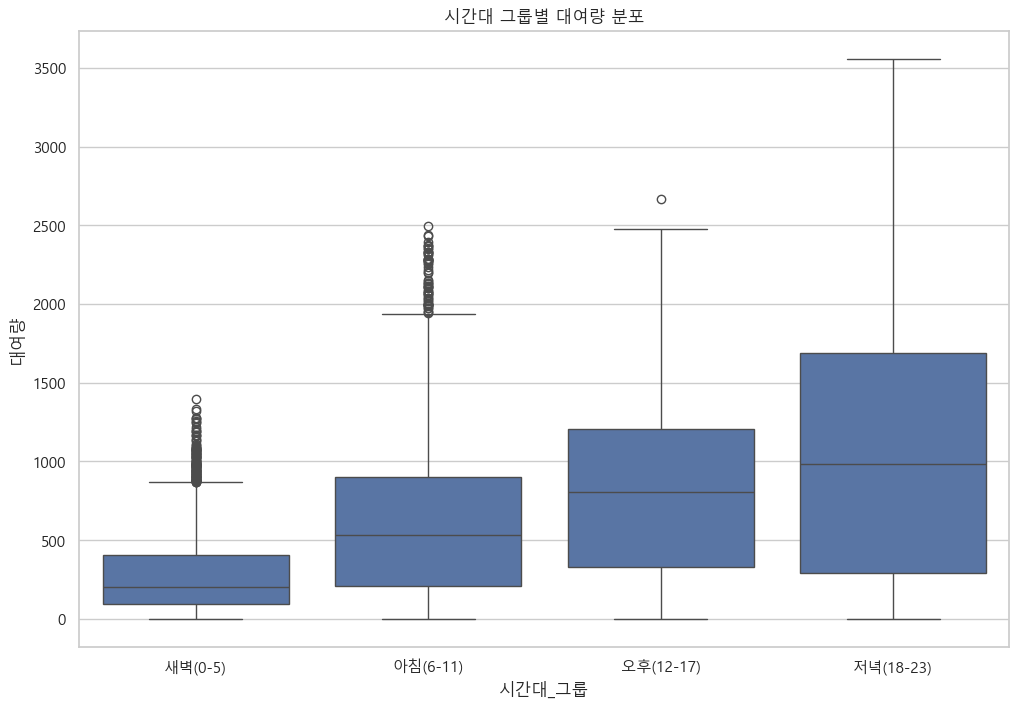

In [ ]:
# 요인별 대여량 분포 시각화

plt.figure(figsize=(12,8))
sns.boxplot(x='계절', y='대여량', data=data)
plt.title('계절별 대여량 분포')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='공휴일 여부', y='대여량', data=data)
plt.title('공휴일 여부별 대여량 분포')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='시간대_그룹', y='대여량', data=data)
plt.title('시간대 그룹별 대여량 분포')
plt.show()


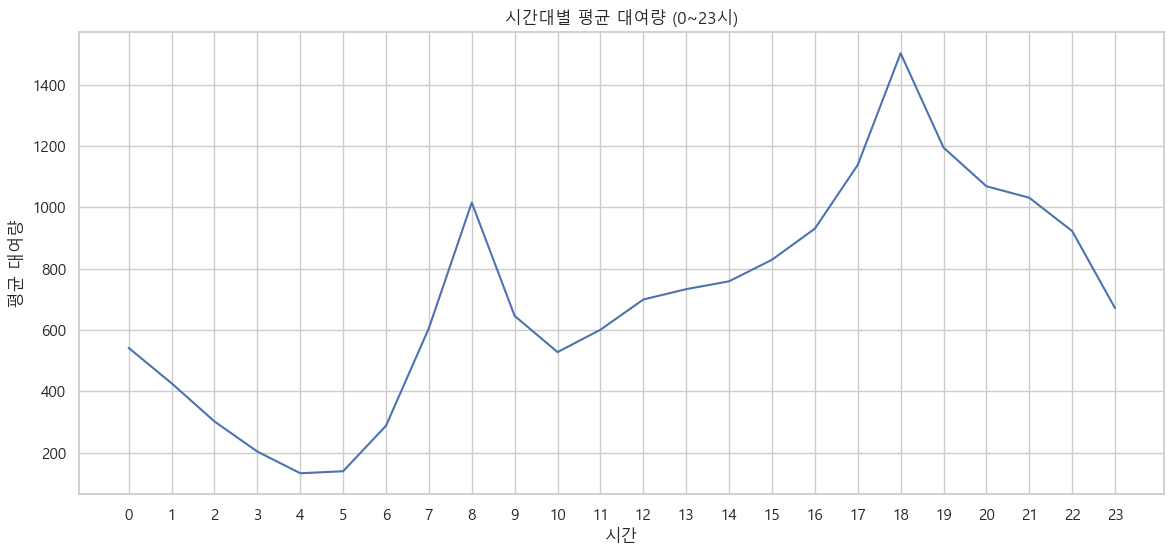

In [15]:
# 시간대별 평균 대여량 시각화 (24시간 기준)

plt.figure(figsize=(14,6))
hourly_mean = data.groupby('시간')['대여량'].mean()
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values)
plt.title('시간대별 평균 대여량 (0~23시)')
plt.xlabel('시간')
plt.ylabel('평균 대여량')
plt.xticks(range(0,24))
plt.show()

# EDA 결과

- 대여량
  - 공휴일보다 평일에 대여량이 더 많음
  - 새벽 - 아침 - 오후 - 저녁 순으로 대여량이 많아짐
  - 사계절 중 겨울이 가장 대여량이 적음
  - 출근 시간대인 오전 8시 및 퇴근 시간대인 18시에 대여량이 피크를 찍음